Import Statements

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

Get the past 10 years of stock price close data for Proctor & Gamble

In [2]:
ticker = 'EBAY' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']

Estimate historical log returns

In [3]:
log_returns = np.log(1 + data.pct_change())
log_returns.tail()

,EBAY
Date,
2020-08-04,-0.004252
2020-08-05,0.005841
2020-08-06,-0.028282
2020-08-07,0.002357
2020-08-10,-0.014780


Plot PG's price

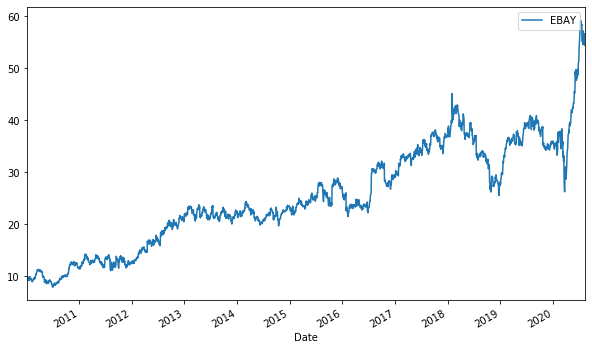

In [4]:
data.plot(figsize=(10, 6));

Plot log returns

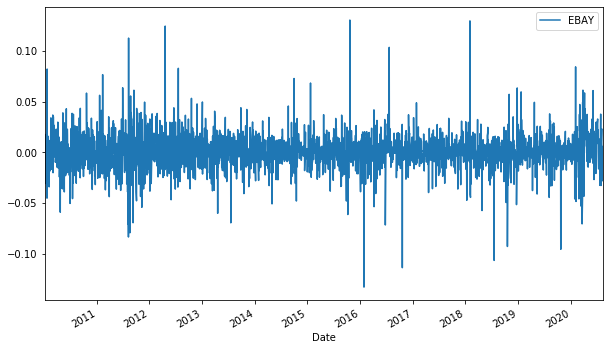

In [5]:
log_returns.plot(figsize = (10, 6))

find the mean

In [6]:
u = log_returns.mean()
u

EBAY    0.000641
dtype: float64

find the variance

In [7]:
var = log_returns.var()
var

EBAY    0.000334
dtype: float64

calculate the drift component for our geometric brownian motion model, mean - 1/2 variance

In [8]:
drift = u - (0.5 * var)
drift

EBAY    0.000474
dtype: float64

stddev of returns

In [9]:
stdev = log_returns.std()
stdev

EBAY    0.018281
dtype: float64

check that the types of our variables are pandas series

In [10]:
type(drift)

pandas.core.series.Series

In [11]:
type(stdev)

pandas.core.series.Series

convert pandas to np arrays

In [12]:
np.array(drift)

array([0.00047424])

In [13]:
drift.values

array([0.00047424])

works with stddev too

In [14]:
stdev.values

array([0.01828091])

function to find standard deviation of percent chance, for instance 95% chance (lower tail probability) is 1.65 standard deviations above the mean

In [15]:
norm.ppf(0.95)

1.6448536269514722

10x2 array of random numbers

In [16]:
x = np.random.rand(10, 2)
x

array([[0.99841021, 0.89868103],
       [0.527531  , 0.26811091],
       [0.24065357, 0.93223674],
       [0.85712818, 0.10789094],
       [0.68504482, 0.4559854 ],
       [0.87184155, 0.03146055],
       [0.81191172, 0.8088588 ],
       [0.61458597, 0.80048875],
       [0.45887088, 0.5179412 ],
       [0.11787634, 0.34517809]])

pass the random numbers into the ppf function

In [17]:
norm.ppf(x)

array([[ 2.94982059,  1.27407188],
       [ 0.06906485, -0.61853639],
       [-0.70420176,  1.49265879],
       [ 1.0675055 , -1.23782253],
       [ 0.48185302, -0.11055302],
       [ 1.13513943, -1.85974857],
       [ 0.88496306,  0.87369862],
       [ 0.29129193,  0.8433683 ],
       [-0.10327872,  0.04498708],
       [-1.18566994, -0.39837174]])

call this a random variable denoted $Z$

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.23142738,  0.69518713],
       [-0.50682691,  1.64468978],
       [-1.49552259,  0.80125809],
       [-0.32016509,  0.82636716],
       [-0.99838278,  1.71905209],
       [-0.93274069, -0.60533981],
       [-0.02623954,  0.02503803],
       [ 0.00369767, -1.54407322],
       [-0.14027003, -1.74419516],
       [ 0.68397619,  0.06301485]])

variables for the simulation

`t_intervals` is the number of days in the future

`iterations` is the number of times to simulate

In [57]:
t_intervals = 39
iterations = 1000000

matrix of daily returns = $e^{\text{drift} + \text{stddev} \cdot Z}$

In [58]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.02138966, 1.00041355, 1.02147492, ..., 0.99021693, 0.9927026 ,
        0.96971457],
       [0.99337032, 1.04271238, 1.04611863, ..., 0.99117941, 1.02882776,
        0.98464462],
       [0.98624446, 1.02208672, 1.00217432, ..., 1.01349626, 1.00153996,
        1.01735075],
       ...,
       [1.06532966, 1.0050934 , 0.99829395, ..., 0.98506828, 0.98942273,
        0.99328064],
       [1.01516226, 1.00891574, 0.9618629 , ..., 1.000641  , 0.97853523,
        1.00116422],
       [0.98281128, 1.00452502, 0.97762632, ..., 0.96962602, 0.98796913,
        0.99508954]])

Each row represents a day, each column represents a simulation. The values are the daily returns for that day and simulation. $S_{t+1} = S_{t-1} \cdot r$. We set $S_0$ equal to the current stock price.

In [59]:
S0 = data.iloc[-1]
S0

EBAY    54.400002
Name: 2020-08-10 00:00:00, dtype: float64

create a new array with the same dimentions as `daily returns`

In [60]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

set the first row (first day) of the simulation equal to the current price

In [61]:
price_list[0] = S0
price_list

array([[54.40000153, 54.40000153, 54.40000153, ..., 54.40000153,
        54.40000153, 54.40000153],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

simulate each day

In [62]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

did it work?

In [63]:
price_list

array([[54.40000153, 54.40000153, 54.40000153, ..., 54.40000153,
        54.40000153, 54.40000153],
       [54.03934673, 56.7235549 , 56.90885483, ..., 53.92016116,
        55.96823158, 53.56466872],
       [53.29600615, 57.97639224, 57.03259317, ..., 54.64788181,
        56.05442055, 54.49405587],
       ...,
       [64.07919466, 66.90934424, 57.67231543, ..., 46.24661494,
        53.73360812, 52.67565637],
       [65.05077985, 67.50589083, 55.47286067, ..., 46.27625909,
        52.58022871, 52.73698261],
       [63.93263992, 67.81135628, 54.2317288 , ..., 44.87066505,
        51.94764307, 52.47801952]])

plot the iterations if there aren't too many

In [64]:
if iterations <= 10000:
    plt.figure(figsize=(10,6))
    plt.plot(price_list);

the final prices after 60 days for each iteration

In [65]:
final_prices = price_list[-1]

a histogram of the prices after 60 days

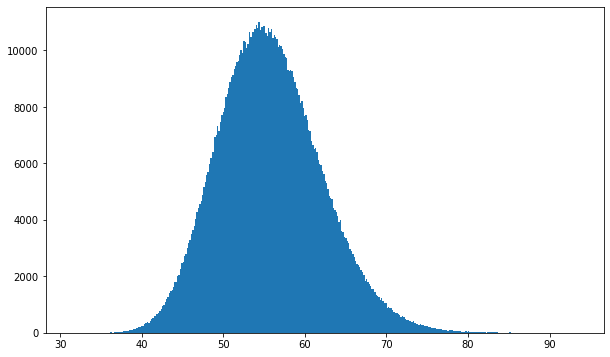

In [66]:
plt.figure(figsize=(10,6))
plt.hist(final_prices, bins='auto');

calculate the cumulative probability that the stock will be between two values

In [67]:
lb = -1
lb_inclusive = True
ub = 55
ub_inclusive = False

total_prices = 0
counted = 0
for price in final_prices:
    lb_condition = lb == -1 or price > lb
    ub_condition = ub == -1 or price < ub
    if lb_condition and ub_condition:
        counted += 1
    elif lb_inclusive and price == lb:
        counted += 1
    elif ub_inclusive and price == ub:
        counted += 1
    total_prices += 1

counted / total_prices

0.475212

class to represent a bundle of option contracts with a function to calculate the p/l at a given price

In [68]:
class OptionsStrategy:
    def __init__(self, contracts):
        self.contracts = contracts
        
    def reward(self, mkt):
        credit = -0.02

        for contract in self.contracts:
            if contract[0] == "LONG":
                credit -= contract[2]
                if contract[1] == "CALL" and mkt > contract[3]:
                    credit += mkt - contract[3]
                elif contract[1] == "PUT" and mkt < contract[3]:
                    credit += contract[3] - mkt
            elif contract[0] == "SHORT":
                credit += contract[2]
                if contract[1] == "CALL" and mkt > contract[3]:
                    credit -= mkt - contract[3]
                elif contract[1] == "PUT" and mkt < contract[3]:
                    credit -= contract[3] - mkt

        return credit

test a strategy

In [69]:
# ("LONG", "CALL", premium, strike)

trial_strategy = OptionsStrategy([
    ("SHORT", "PUT", 1.93, 55),
    ("LONG", "PUT", 0, 50)
])

plot the profit/loss diagram

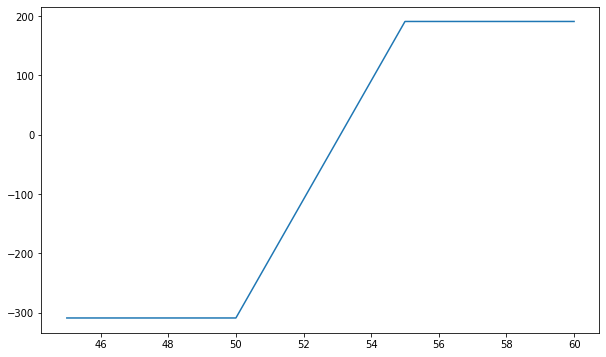

In [70]:
plt.figure(figsize=(10,6))
x = np.linspace(45, 60, 100)
plt.plot(x, [trial_strategy.reward(xi) * 100 for xi in x]);

calculate ev of the strategy

In [71]:
granularity = len(final_prices)

ev = 0
max_risk = 0
prob_success = 0
for price in final_prices:
    reward = trial_strategy.reward(price) * 100
    ev += reward / granularity
    if reward > 0:
        prob_success += 1
    if reward < max_risk:
        max_risk = reward
    
ev

30.192536428375114

capital risked

In [72]:
max_risk

-309.0

expected return on capital risked

In [73]:
-1 * ev / max_risk

0.09771047387823661

probability of success

In [74]:
prob_success / granularity

0.646279